In [1]:
customers = read.csv('telco-churn.csv')
summary(customers)
str(customers)

    gender     SeniorCitizen    Partner    Dependents     tenure     
 Female:3483   Min.   :0.0000   No :3639   No :4933   Min.   : 1.00  
 Male  :3549   1st Qu.:0.0000   Yes:3393   Yes:2099   1st Qu.: 9.00  
               Median :0.0000                         Median :29.00  
               Mean   :0.1624                         Mean   :32.42  
               3rd Qu.:0.0000                         3rd Qu.:55.00  
               Max.   :1.0000                         Max.   :72.00  
 PhoneService    InternetService           Contract    PaperlessBilling
 No : 680     DSL        :2416   Month-to-month:3875   No :2864        
 Yes:6352     Fiber optic:3096   One year      :1472   Yes:4168        
              No         :1520   Two year      :1685                   
                                                                       
                                                                       
                                                                       
      

'data.frame':	7032 obs. of  13 variables:
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ Contract        : Factor w/ 3 levels "Month-to-month",..: 1 2 1 2 1 1 1 1 1 2 ...
 $ PaperlessBilling: Factor w/ 2 levels "No","Yes": 2 1 2 1 2 2 2 1 2 1 ...
 $ PaymentMethod   : Factor w/ 4 levels "Bank transfer (automatic)",..: 3 4 4 1 3 3 2 4 3 1 ...
 $ MonthlyCharges  : num  29.9 57 53.9 42.3 70.7 ...
 $ TotalCharges    : num  29.9 1889.5 108.2 1840.8 151.7 ...
 $ Churn           : int  0 0 1 0 1 1 0 0 1 0 ...


In [2]:
sum(customers$Churn)

[1] 1869

In [10]:
tapply(customers$MonthlyCharges, customers$Contract == 'Month-to-month', mean)

ERROR while rich displaying an object: Error in dn[[2L]]: subscript out of bounds

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_markdown.numeric(obj)
9. repr_vector_g

FALSE     TRUE 
62.83397 66.39849

In [13]:
library(caTools)
set.seed(1)
spl = sample.split(customers$Churn, SplitRatio = 0.7)
train = subset(customers, spl == TRUE)
test = subset(customers, spl == FALSE)

In [15]:
table(train$Churn)
table(test$Churn)


   0    1 
3614 1308 


   0    1 
1549  561 

In [17]:
1549 / nrow(test)

[1] 0.7341232

In [19]:
log1 = glm(Churn ~ tenure, data=train, family=binomial)
prediction = predict(log1, newdata=test, type="response") > 0.5
table(prediction, test$Churn)

          
prediction    0    1
     FALSE 1478  442
     TRUE    71  119

In [20]:
(1478+119) / nrow(test)
119 / (119+442)
71 / (71+1478)

[1] 0.756872

[1] 0.2121212

[1] 0.04583602

In [21]:
summary(log1)


Call:
glm(formula = Churn ~ tenure, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1858  -0.8440  -0.4689   1.1690   2.3850  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.059313   0.050868   1.166    0.244    
tenure      -0.039493   0.001685 -23.435   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 5699.5  on 4921  degrees of freedom
Residual deviance: 5005.1  on 4920  degrees of freedom
AIC: 5009.1

Number of Fisher Scoring iterations: 4


In [23]:
prediction = predict(log1, newdata=test, type="response") > 0.3
table(prediction, test$Churn)

          
prediction    0    1
     FALSE 1015  169
     TRUE   534  392

In [25]:
(1015+392) / nrow(test)
392 / (392+169)
534 / (534+1015)

[1] 0.6668246

[1] 0.6987522

[1] 0.3447385

In [26]:
log2 = glm(Churn ~ ., data=train, family=binomial)
summary(log2)


Call:
glm(formula = Churn ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7135  -0.7003  -0.2996   0.7876   3.4895  

Coefficients:
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                           1.103e-02  2.635e-01   0.042 0.966607    
genderMale                            4.286e-03  7.673e-02   0.056 0.955452    
SeniorCitizen                         1.721e-01  9.934e-02   1.733 0.083150 .  
PartnerYes                            9.759e-02  9.190e-02   1.062 0.288272    
DependentsYes                        -1.386e-01  1.054e-01  -1.316 0.188341    
tenure                               -6.070e-02  7.372e-03  -8.234  < 2e-16 ***
PhoneServiceYes                      -7.686e-01  1.716e-01  -4.480 7.47e-06 ***
InternetServiceFiber optic            9.785e-01  1.591e-01   6.150 7.77e-10 ***
InternetServiceNo                    -4.057e-01  2.247e-01  -1.806 0.070995 .  
Contra

In [35]:
result = predict(log2, newdata=test, type="response")
table(result>.5, test$Churn)

       
           0    1
  FALSE 1398  251
  TRUE   151  310

In [32]:
(1398+310) / nrow(test)

[1] 0.8094787

[1] 0.8435803

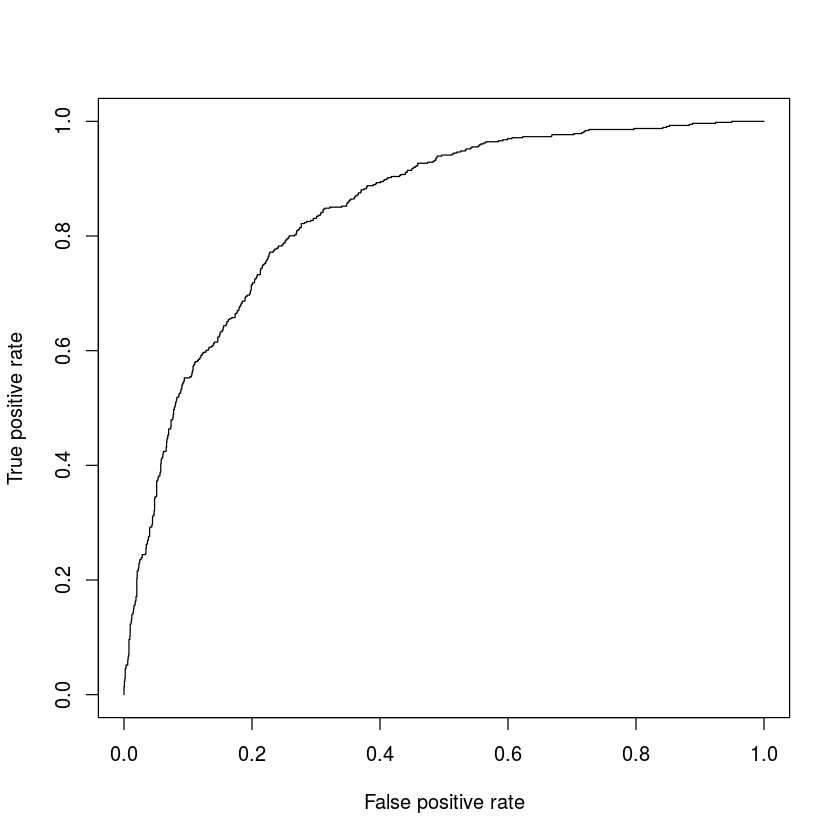

In [38]:
library(ROCR)
pred = prediction(result, test$Churn)
perf = performance(pred, "tpr", "fpr")
plot(perf)
as.numeric(performance(pred, "auc")@y.values)

In [44]:
set.seed(2)
library(rpart)
library(e1071)
library(caret)
trainset = train
trainset$Churn = as.factor(trainset$Churn)
numFolds = trainControl( method = "cv", number = 10 )
cpGrid = expand.grid( .cp = seq(0.001,0.05,0.001)) 
cv = train(y = trainset$Churn, x = subset(trainset, select=-c(Churn)), method = "rpart", trControl = numFolds, tuneGrid = cpGrid)

In [45]:
cv

CART 

4922 samples
  12 predictors
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4429, 4429, 4429, 4430, 4431, 4429, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.001  0.7832126  0.4062902
  0.002  0.7895089  0.4325894
  0.003  0.7949917  0.4566237
  0.004  0.7951946  0.4643329
  0.005  0.7955973  0.4697463
  0.006  0.7943774  0.4597698
  0.007  0.7927572  0.4458371
  0.008  0.7864630  0.4099815
  0.009  0.7842259  0.3862573
  0.010  0.7870735  0.3684397
  0.011  0.7860573  0.3603338
  0.012  0.7860573  0.3603338
  0.013  0.7860573  0.3603338
  0.014  0.7860573  0.3603338
  0.015  0.7848353  0.3586054
  0.016  0.7848353  0.3586054
  0.017  0.7848353  0.3586054
  0.018  0.7876866  0.3565063
  0.019  0.7876866  0.3565063
  0.020  0.7876866  0.3565063
  0.021  0.7876866  0.3565063
  0.022  0.7876866  0.3565063
  0.023  0.7876866  0.3565063
  0.024  0.7876866  0.3565063
  0.025  0.7876866  

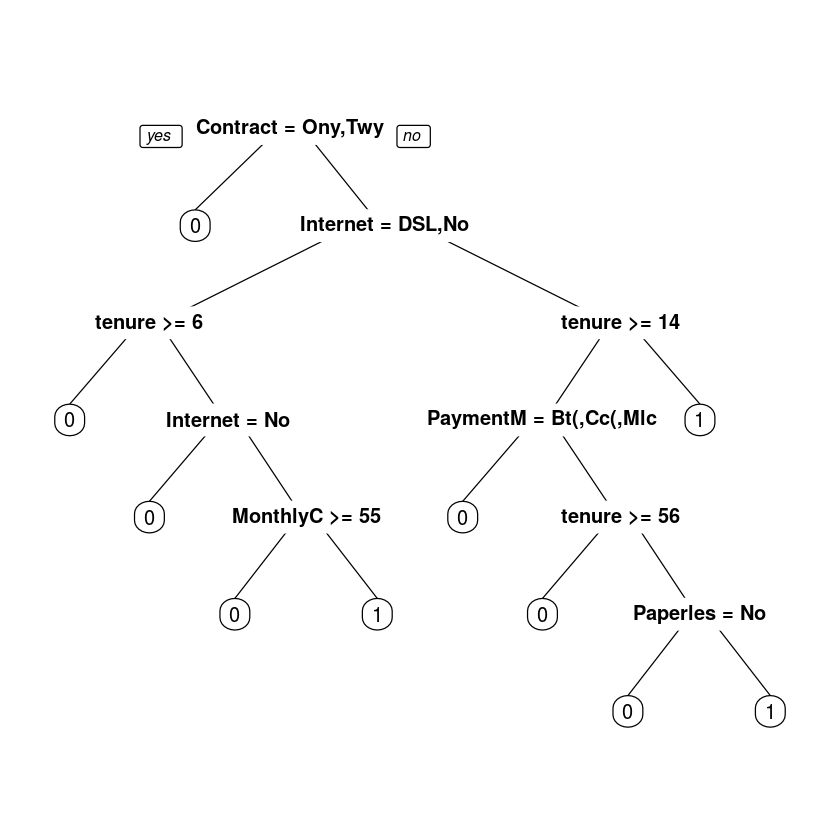

In [53]:
set.seed(2)
tree = rpart(Churn ~ ., data = train, method="class", cp = 0.005)
library(rpart.plot)
prp(tree)

In [54]:
result = predict(tree, newdata = test, type = "class")
table(result, test$Churn)

      
result    0    1
     0 1340  233
     1  209  328

In [55]:
(1340+328) / nrow(test)

[1] 0.7905213

In [56]:
328 / (328 + 233)
209 / (209 + 1340)

[1] 0.5846702

[1] 0.1349258